In [1]:
Correlation of transfer price of a football player with performance per 90


Hypothesis: Transfer fees improve performance up to a point, after which players are overpriced and under-deliver.

SyntaxError: invalid syntax (576376461.py, line 1)

In [5]:
import os
os.getcwd()


'/home/5cea8fb9-547f-4c9c-8a98-e4f5fa134c73'

In [ ]:
Cleaning and extracting data

In [6]:
import os
os.listdir()



['.anaconda',
 '.gitconfig',
 '.jupyter',
 '.ipynb_checkpoints',
 'README.ipynb',
 '.vimrc',
 '.virtualenvs',
 '.npm',
 'anaconda_projects',
 '00_Project_Definition.ipynb',
 '.local',
 '.profile',
 'Untitled.ipynb',
 '.bashrc',
 '.pythonstartup.py',
 '.ipython']

In [ ]:
import pandas as pd
df = pd.read_excel('player_data.xlsx')
df.head()


df = df.dropna(how='all')


In [9]:
df = df.dropna(axis=1, how='all')


In [10]:
df = df.dropna()


In [11]:
df.isnull().sum()


Players Name    0
Transfer        0
Performance     0
dtype: int64

In [14]:
import pandas as pd

df = pd.read_excel('player_data.xlsx', header=None)  # No header row yet
df = df.dropna(how='all')
df = df.reset_index(drop=True)
df.columns = ['Name', 'Transfer_Fee', 'Rating']
df.head(6)


,Name,Transfer_Fee,Rating
0,Players Name,Transfer,Performance
1,Gabriel Jesus,52,7.42
2,Fabio Vieira,35,6.31
3,Leandro Trossard,24,6.84
4,Isak,70,7.06
5,Casemiro,70.43,7.17


In [17]:
df.head(20)

,Name,Transfer_Fee,Rating
0,Players Name,Transfer,Performance
1,Gabriel Jesus,52,7.42
2,Fabio Vieira,35,6.31
3,Leandro Trossard,24,6.84
4,Isak,70,7.06
5,Casemiro,70.43,7.17
6,Mikkel Damsgard,15,6.35
7,Enciso,12,6.78
8,Marc Cucurella,65,6.65
9,Amadou Onana,40,6.71


In [ ]:
Check Data type


In [18]:
df.describe()


,Name,Transfer_Fee,Rating
count,22,22,22
unique,22,22,22
top,Players Name,Transfer,Performance
freq,1,1,1


In [20]:
print(df[['Transfer_Fee', 'Rating']].dtypes)

Transfer_Fee    object
Rating          object
dtype: object


In [21]:
# Convert Transfer_Fee to numeric, handling non-numeric values
df['Transfer_Fee'] = pd.to_numeric(df['Transfer_Fee'], errors='coerce')

# Convert Rating to numeric if needed
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [22]:
df[['Transfer_Fee', 'Rating']].corr()

,Transfer_Fee,Rating
Transfer_Fee,1.00000,0.42538
Rating,0.42538,1.00000


In [ ]:
Value index gives the best value for money deal. I.e Rating/Money

In [24]:
df['Value_Index'] = df['Rating'] / df['Transfer_Fee']
df.sort_values('Value_Index', ascending=False).head()


,Name,Transfer_Fee,Rating,Value_Index
13,Andreas Pereira,10.0,6.73,0.673000
7,Enciso,12.0,6.78,0.565000
10,Neal Maupay,11.0,6.20,0.563636
6,Mikkel Damsgard,15.0,6.35,0.423333
12,Issa Diop,18.0,6.66,0.370000


In [ ]:
See the correlation of the data of rating and transfer fee

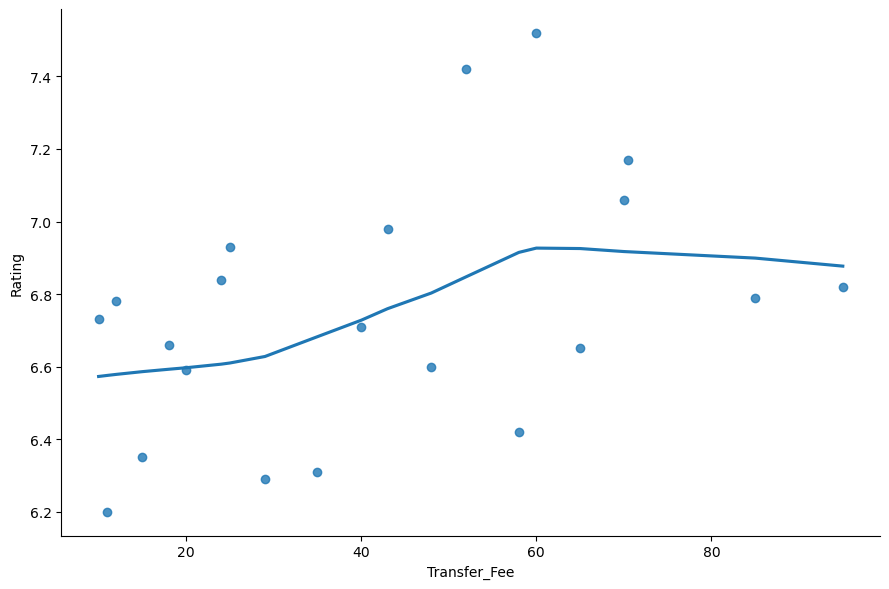

In [25]:
sns.lmplot(data=df, x='Transfer_Fee', y='Rating', lowess=True, height=6, aspect=1.5)


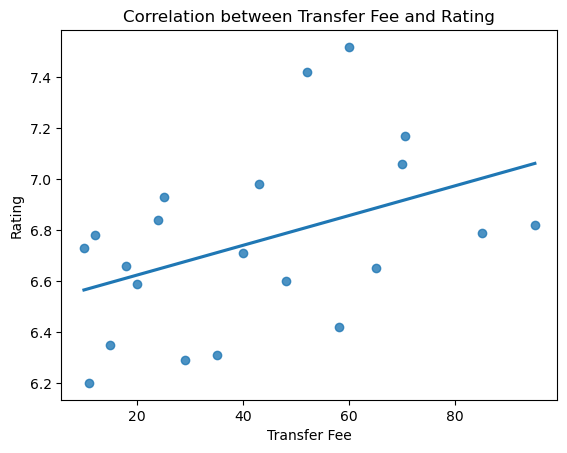

In [26]:
# Plot scatter plot with regression line
sns.regplot(x='Transfer_Fee', y='Rating', data=df, ci=None)

plt.title('Correlation between Transfer Fee and Rating')
plt.xlabel('Transfer Fee')
plt.ylabel('Rating')
plt.show()

In [31]:
df = df.dropna(subset=['Transfer_Fee', 'Rating'])
from scipy.optimize import curve_fit

def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

popt, pcov = curve_fit(
    quadratic_model,
    df['Transfer_Fee'],
    df['Rating'],
    p0=[1, 1, 1]  # Initial guesses for a, b, c
)
a, b, c = popt
ideal_price = -b / (2 * a)

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

# Clean data
df = df.dropna()
df['Transfer_Fee'] = pd.to_numeric(df['Transfer_Fee'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna()

# Check for constant values
assert df['Transfer_Fee'].nunique() > 1, "Transfer_Fee has no variance!"

# Fit polynomial
try:
    coefficients = np.polyfit(df['Transfer_Fee'], df['Rating'], 2)
    a, b, c = coefficients
    ideal_price = -b / (2 * a)
    print(f"Ideal Transfer Fee: {ideal_price:.2f}")
except np.linalg.LinAlgError:
    print("Failed to fit polynomial. Try cleaning data or using curve_fit.")

Ideal Transfer Fee: 73.47
